# **Dataset Description**

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

### **Data Fields**

- **id**: A unique identifier for each trip  
- **vendor_id**: A code indicating the provider associated with the trip record  
- **pickup_datetime**: Date and time when the meter was engaged  
- **dropoff_datetime**: Date and time when the meter was disengaged  
- **passenger_count**: The number of passengers in the vehicle (driver entered value)  
- **pickup_longitude**: The longitude where the meter was engaged  
- **pickup_latitude**: The latitude where the meter was engaged  
- **dropoff_longitude**: The longitude where the meter was disengaged  
- **dropoff_latitude**: The latitude where the meter was disengaged  
- **store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server  
  - **Y** = Store and forward  
  - **N** = Not a store and forward trip  
- **trip_duration**: Duration of the trip in seconds  

---

##**Task Description**:


#### Feature Engineering:

 Create additional features that might be useful for predicting equipment failure. Consider time-based features, rolling statistics, and any other relevant transformations.


In [77]:
pip install haversine

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from geopy.distance import great_circle

In [79]:
nyc = pd.read_csv('/content/NYC.csv')
nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [80]:
def basic_info(df):
     print("----------------------------- SHAPE -----------------------------")
     display(df.shape)
     print("----------------------------- INFO -----------------------------")
     display(df.info())

     print("----------------------------- DESCRIBE -----------------------------")
     display(df.describe().T)
     print("----------------------------- DUPLICATED VALUES -----------------------------")
     display(df.duplicated().sum())
     print("----------------------------- MISSING VALUES -----------------------------")
     display(df.isnull().sum())



basic_info(nyc)

----------------------------- SHAPE -----------------------------


(205957, 11)

----------------------------- INFO -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205957 entries, 0 to 205956
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  205957 non-null  object 
 1   vendor_id           205957 non-null  int64  
 2   pickup_datetime     205957 non-null  object 
 3   dropoff_datetime    205957 non-null  object 
 4   passenger_count     205957 non-null  int64  
 5   pickup_longitude    205957 non-null  float64
 6   pickup_latitude     205957 non-null  float64
 7   dropoff_longitude   205956 non-null  float64
 8   dropoff_latitude    205956 non-null  float64
 9   store_and_fwd_flag  205956 non-null  object 
 10  trip_duration       205956 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 17.3+ MB


None

----------------------------- DESCRIBE -----------------------------


,count,mean,std,min,25%,50%,75%,max
vendor_id,205957.0,1.535063,0.498770,1.000000,1.000000,2.000000,2.000000,2.000000
passenger_count,205957.0,1.664270,1.312981,0.000000,1.000000,1.000000,2.000000,6.000000
pickup_longitude,205957.0,-73.973475,0.039472,-77.896019,-73.991829,-73.981735,-73.967278,-72.809669
pickup_latitude,205957.0,40.750896,0.089640,4.000000,40.737415,40.754208,40.768391,51.881084
dropoff_longitude,205956.0,-73.973463,0.037442,-77.896019,-73.991318,-73.979729,-73.962921,-72.711395
dropoff_latitude,205956.0,40.751981,0.033603,37.777771,40.736130,40.754559,40.769920,43.486885
trip_duration,205956.0,946.958239,3106.334380,1.000000,395.000000,661.000000,1073.000000,86390.000000


----------------------------- DUPLICATED VALUES -----------------------------


0

----------------------------- MISSING VALUES -----------------------------


,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
store_and_fwd_flag,1


In [81]:
nyc['pickup_point'] =list(zip(nyc['pickup_latitude'], nyc['pickup_longitude']))
nyc['dropoff_point'] = list(zip(nyc['dropoff_latitude'], nyc['dropoff_longitude']))

In [82]:
from haversine import haversine

# Example: Calculate distance between two points
nyc['distance'] = nyc.apply(
    lambda row: haversine(row['pickup_point'], row['dropoff_point']), axis=1
)

In [83]:
nyc.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_point', 'dropoff_point'], axis=1, inplace=True)

In [84]:
 nyc.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,455.0,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,663.0,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,2124.0,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,429.0,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,435.0,1.188590


In [85]:
def numerical_analysis(df):
    print("----------------------------- CORRELATION -----------------------------")
    display(df.corr())
    print("----------------------------- CORRELATION HEATMAP -----------------------------")
    sns.heatmap(df.corr(), annot=True)
    plt.show()

In [86]:
numerical_data = nyc[[ col for col in nyc.columns if nyc[col].dtypes == 'int' or nyc[col].dtypes == 'float']]

----------------------------- CORRELATION -----------------------------


,vendor_id,passenger_count,trip_duration,distance
vendor_id,1.000000,0.287201,0.034560,0.005695
passenger_count,0.287201,1.000000,0.011650,0.006115
trip_duration,0.034560,0.011650,1.000000,0.137931
distance,0.005695,0.006115,0.137931,1.000000


----------------------------- CORRELATION HEATMAP -----------------------------


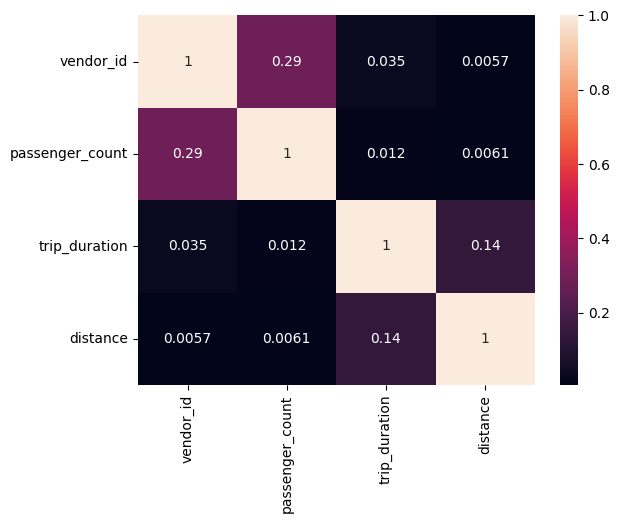

In [87]:
numerical_analysis(numerical_data)

In [88]:
pd.pivot_table(nyc, index='passenger_count', columns='vendor_id', values='trip_duration', aggfunc='count')

vendor_id,1,2
passenger_count,,
0,NaN,3.0
1,77731.0,68173.0
2,13029.0,16696.0
3,3237.0,5253.0
4,1694.0,2281.0
5,39.0,11073.0
6,26.0,6721.0


Scatter plot

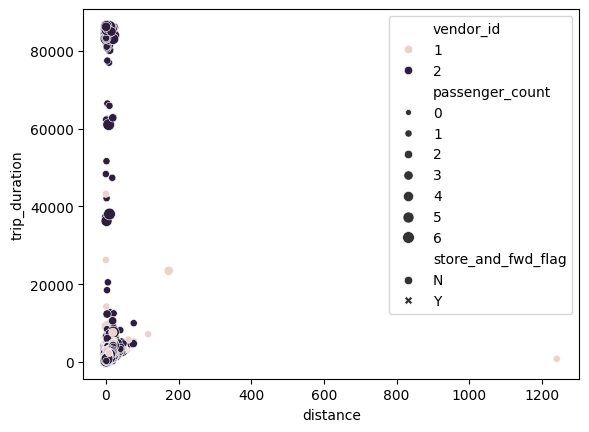

In [89]:
sns.scatterplot(
     x='distance',
     y='trip_duration',
     hue='vendor_id',
     style='store_and_fwd_flag',
     size='passenger_count',
     data=nyc
 )
plt.show()

#####Analyze data is normalize using trip duration

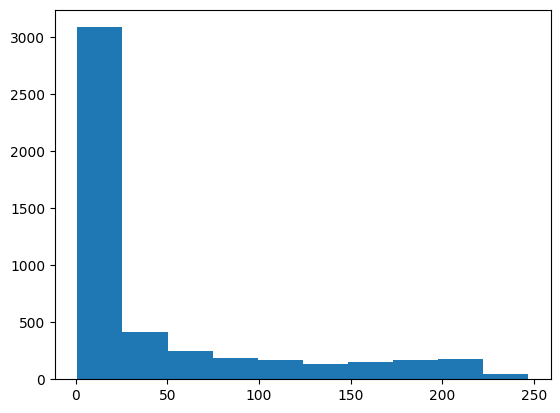

In [90]:
plt.hist(nyc['trip_duration'].value_counts())
plt.show()

In [91]:
nyc['trip_duration'].max()

86390.0

In [92]:
nyc.duplicated().sum()

0

In [93]:
nyc.trip_duration.quantile(.99)

3406.0

# ***Outlier detection***



### 1.   Filtered data on behalf on  distance feature




In [94]:
nyc2 = nyc[(nyc['trip_duration']<=nyc.trip_duration.quantile(.9999)) | (nyc['trip_duration']>=nyc.trip_duration.quantile(.0001))]

In [95]:
nyc2['trip_duration_hours'] = nyc2['trip_duration']/3600  # convert second to hours

nyc2['speed_kph'] = nyc2['distance']/nyc2['trip_duration_hours']

<ipython-input-95-f8cd1411243f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc2['trip_duration_hours'] = nyc2['trip_duration']/3600  # convert second to hours
<ipython-input-95-f8cd1411243f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc2['speed_kph'] = nyc2['distance']/nyc2['trip_duration_hours']


In [96]:
 nyc2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,trip_duration_hours,speed_kph
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,455.0,1.498523,0.126389,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,663.0,1.805510,0.184167,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,2124.0,6.385107,0.590000,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,429.0,1.485500,0.119167,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,435.0,1.188590,0.120833,9.836608


In [97]:
nyc2.speed_kph.describe()

,speed_kph
count,205956.000000
mean,14.432315
std,15.027490
min,0.000000
25%,9.137341
50%,12.796920
75%,17.861049
max,5640.501776


In [98]:
Q1 = nyc2['speed_kph'].quantile(0.25)
Q3 = nyc2['speed_kph'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = nyc2[(nyc2['speed_kph'] >= lower_bound) & (nyc2['speed_kph'] <= upper_bound)]

Filtering data via using speed kilometer per hour feature

In [99]:
nyc2[(nyc2['speed_kph'] <= lower_bound) | (nyc2['speed_kph'] >= upper_bound)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,trip_duration_hours,speed_kph
50,id2067879,2,2016-01-19 23:19:01,2016-01-19 23:44:58,1,N,1557.0,17.340841,0.432500,40.094431
54,id0526266,2,2016-05-15 09:42:58,2016-05-15 09:56:37,1,N,819.0,9.617850,0.227500,42.276264
67,id3913101,1,2016-06-25 22:05:46,2016-06-25 22:22:29,2,N,1003.0,13.111154,0.278611,47.058979
86,id0283075,1,2016-04-06 23:42:26,2016-04-07 00:12:08,1,N,1782.0,18.773512,0.495000,37.926287
102,id0105610,1,2016-02-19 20:01:24,2016-02-19 20:35:49,3,N,2065.0,19.860078,0.573611,34.622897
...,...,...,...,...,...,...,...,...,...,...
205804,id0698985,1,2016-06-02 09:44:05,2016-06-02 09:59:57,1,N,952.0,8.606924,0.264444,32.547193
205805,id2935793,1,2016-02-17 22:55:16,2016-02-17 23:28:46,1,N,2010.0,17.782314,0.558333,31.848921
205843,id0726507,2,2016-04-01 10:21:55,2016-04-01 11:01:52,1,N,2397.0,20.934620,0.665833,31.441231
205882,id0872606,2,2016-02-06 09:39:25,2016-02-06 09:57:16,5,N,1071.0,11.763683,0.297500,39.541792


### 2. Analyze data on the behalf of datetime columns

In [100]:
nyc3 = nyc2[(nyc2['speed_kph'] >= lower_bound) & (nyc2['speed_kph'] <= upper_bound)]

In [101]:
nyc3.shape

(197453, 10)

In [102]:
nyc3['pickup_datetime'] = pd.to_datetime(nyc3['pickup_datetime'])
nyc3['dropoff_datetime'] = pd.to_datetime(nyc3['dropoff_datetime'])

<ipython-input-102-d04d8870a433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc3['pickup_datetime'] = pd.to_datetime(nyc3['pickup_datetime'])
<ipython-input-102-d04d8870a433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc3['dropoff_datetime'] = pd.to_datetime(nyc3['dropoff_datetime'])


In [103]:
nyc3['pickup_day'] = nyc3['pickup_datetime'].dt.dayofweek
nyc3['pickup_day_name'] = nyc3['pickup_datetime'].dt.day_name()
nyc3['pickup_month'] = nyc3['pickup_datetime'].dt.month
nyc3['pickup_month_name'] = nyc3['pickup_datetime'].dt.month_name()
nyc3['is_weekend'] = nyc3['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)
nyc3['pickup_hour'] = nyc3['pickup_datetime'].dt.hour

<ipython-input-103-38e41b83c0b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc3['pickup_day'] = nyc3['pickup_datetime'].dt.dayofweek
<ipython-input-103-38e41b83c0b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc3['pickup_day_name'] = nyc3['pickup_datetime'].dt.day_name()
<ipython-input-103-38e41b83c0b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [104]:
# nyc3[['pickup_day','pickup_day_name','pickup_month','pickup_month_name','is_weekend','pickup_hour']].head()

In [105]:
def is_rush_hour(hour):
    return 7 <= hour <= 9 or 16 <= hour <= 19

nyc3['is_rush_hour'] = nyc3['pickup_hour'].apply(is_rush_hour).astype(int)
# nyc3['is_rush_hour'] = nyc3['is_rush_hour'].where(nyc3['is_rush_hour'] != 0, 1)

<ipython-input-105-f852128105f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc3['is_rush_hour'] = nyc3['pickup_hour'].apply(is_rush_hour).astype(int)


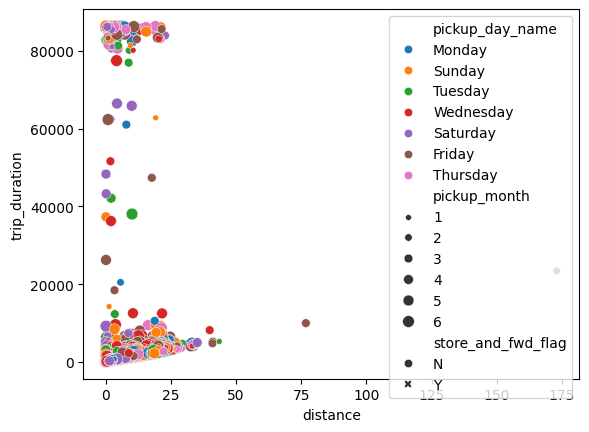

In [106]:
sns.scatterplot(x ='distance',y='trip_duration',hue='pickup_day_name',style='store_and_fwd_flag',size='pickup_month',data=nyc3)
plt.show()

In [107]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

nyc3['pickup_season'] = nyc3['pickup_month'].apply(get_season)

<ipython-input-107-3f67973ba201>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc3['pickup_season'] = nyc3['pickup_month'].apply(get_season)


In [108]:
nyc3.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,trip_duration_hours,speed_kph,pickup_day,pickup_day_name,pickup_month,pickup_month_name,is_weekend,pickup_hour,is_rush_hour,pickup_season
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,455.0,1.498523,0.126389,11.856445,0,Monday,3,March,0,17,1,Spring
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,663.0,1.805510,0.184167,9.803672,6,Sunday,6,June,1,0,0,Summer
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,2124.0,6.385107,0.590000,10.822216,1,Tuesday,1,January,0,11,0,Winter
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,429.0,1.485500,0.119167,12.465738,2,Wednesday,4,April,0,19,1,Spring
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,435.0,1.188590,0.120833,9.836608,5,Saturday,3,March,1,13,0,Spring


#####Analyze what can effect of different season on trips

In [109]:
nyc3.groupby(['pickup_season'])['trip_duration'].mean()

,trip_duration
pickup_season,
Spring,956.046968
Summer,1023.576779
Winter,882.270673


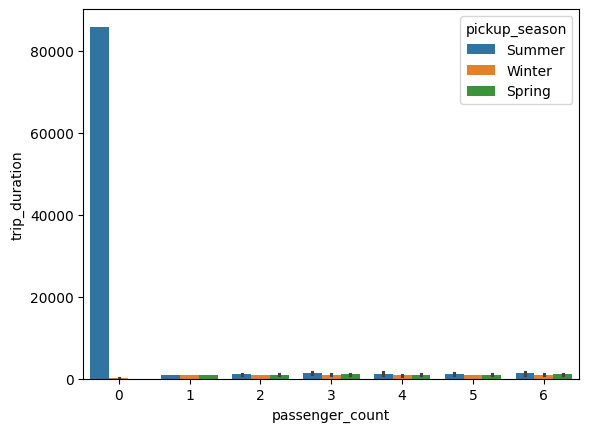

In [110]:
sns.barplot(x='passenger_count', y ="trip_duration",hue='pickup_season',data=nyc3)
plt.show()

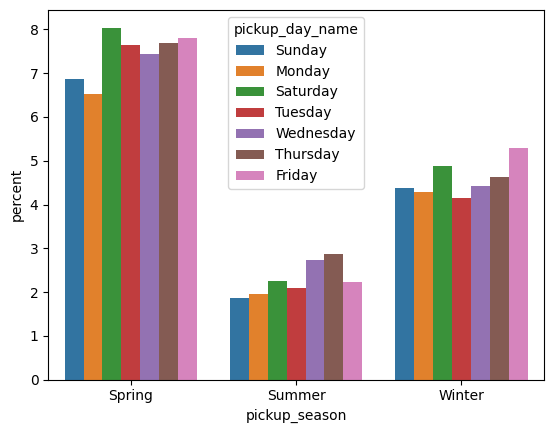

In [111]:
# analyze which season and which day is mostly trip offered
hue_order_lst = nyc3.groupby('pickup_day_name')['trip_duration'].mean().sort_values().index
sns.countplot(x='pickup_season',hue='pickup_day_name',hue_order=hue_order_lst,stat="percent",data=nyc3,width=0.8)
plt.show()

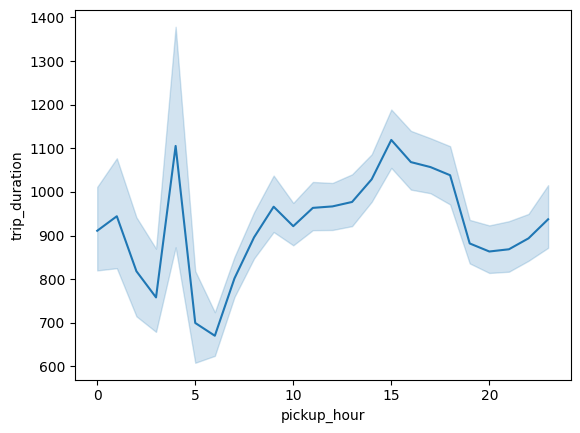

In [112]:
sns.lineplot(x='pickup_hour', y='trip_duration', data=nyc3,)
plt.show()

In [113]:
nyc3.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,trip_duration_hours,speed_kph,pickup_day,pickup_day_name,pickup_month,pickup_month_name,is_weekend,pickup_hour,is_rush_hour,pickup_season
22137,id1373163,1,2016-03-29 09:16:49,2016-03-29 09:25:57,1,N,548.0,1.375240,0.152222,9.034422,1,Tuesday,3,March,0,9,1,Spring
148501,id2593215,1,2016-03-21 14:13:00,2016-03-21 14:47:16,1,N,2056.0,8.751622,0.571111,15.323852,0,Monday,3,March,0,14,0,Spring
152233,id0890193,2,2016-03-05 02:39:16,2016-03-05 02:58:20,1,N,1144.0,8.884760,0.317778,27.959036,5,Saturday,3,March,1,2,0,Spring
27683,id0325296,2,2016-01-14 16:44:38,2016-01-14 16:48:47,1,N,249.0,0.662524,0.069167,9.578662,3,Thursday,1,January,0,16,1,Winter
145364,id2482997,1,2016-03-26 12:49:40,2016-03-26 12:59:34,2,N,594.0,1.436180,0.165000,8.704124,5,Saturday,3,March,1,12,0,Spring


### 3. Passengers Count

----------- Passenger Data ------------------


trip_duration
passenger_count vendor_id               
0               2           28686.666667
1               1             801.916697
                2            1046.876947
2               1             910.050507
                2            1043.652339
3               1             911.812940
                2            1178.130668
4               1             940.992696
                2             928.052799
5               1             732.743590
                2            1000.904524
6               1            1352.041667
                2            1068.290524

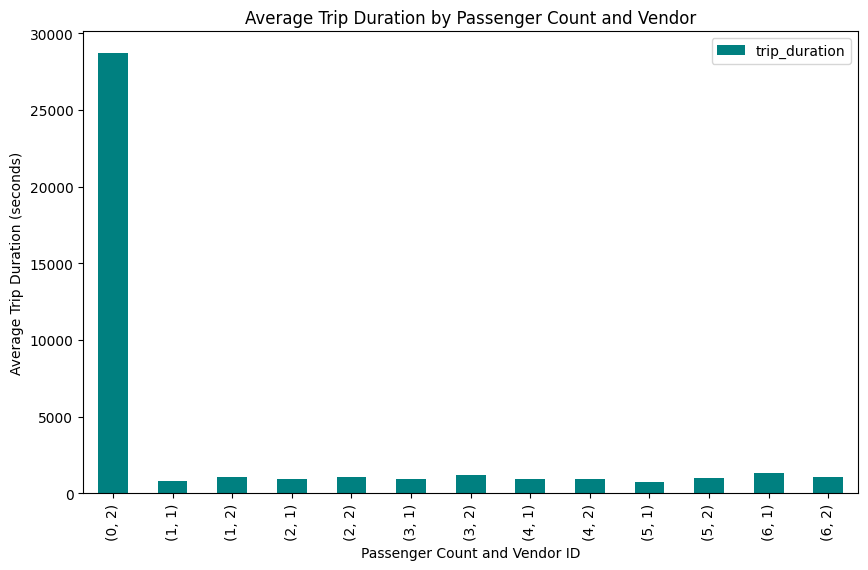

In [114]:
passenger_duration = pd.DataFrame(nyc3.groupby(['passenger_count','vendor_id'])['trip_duration'].mean())

print("----------- Passenger Data ------------------")
display(passenger_duration)
passenger_duration.plot(kind='bar', color="teal", figsize=(10, 6))
plt.title("Average Trip Duration by Passenger Count and Vendor")
plt.xlabel("Passenger Count and Vendor ID")
plt.ylabel("Average Trip Duration (seconds)")
plt.show()

In [115]:

pivot = pd.pivot_table(
    nyc3,
    index='passenger_count',
    columns='vendor_id',
    values='trip_duration',
    aggfunc=['count', 'mean']
)

# Calculate percentage
pivot_percentage = pivot['count'].div(pivot['count'].sum().sum()).multiply(100)

# Combine percentage with the pivot table
pivot = pd.concat([pivot, pivot_percentage.rename(columns=lambda x: f'percentage_{x}')], axis=1)


# Display the final pivot table
print(pd.DataFrame(pivot))

                 (count, 1)  (count, 2)    (mean, 1)     (mean, 2)  \
passenger_count                                                      
0                       NaN         3.0          NaN  28686.666667   
1                   74451.0     65354.0   801.916697   1046.876947   
2                   12513.0     16053.0   910.050507   1043.652339   
3                    3122.0      5028.0   911.812940   1178.130668   
4                    1643.0      2197.0   940.992696    928.052799   
5                      39.0     10610.0   732.743590   1000.904524   
6                      24.0      6416.0  1352.041667   1068.290524   

                 percentage_1  percentage_2  
passenger_count                              
0                         NaN      0.001519  
1                   37.705682     33.098510  
2                    6.337204      8.130036  
3                    1.581136      2.546429  
4                    0.832097      1.112670  
5                    0.019752      5.373431  
6

The above Report explain :


*   vendor 1 claimed mostly trip with single passenger rather than vendor 2
*   vendor 2 claimed mostly trip except single passenger rather than vendor 1



In [116]:
passenger_data = pd.DataFrame(nyc3.groupby(['passenger_count'])['trip_duration'].agg(['mean','count']))
passenger_data['percentage'] =np.round(passenger_data['count']/nyc3.shape[0]*100,2)
passenger_data

,mean,count,percentage
passenger_count,,,
0,28686.666667,3,0.00
1,916.427138,139805,70.80
2,985.129630,28566,14.47
3,1076.113006,8150,4.13
4,933.589323,3840,1.94
5,999.922434,10649,5.39
6,1069.347981,6440,3.26


We see that Majority of passengers travel single around 70.83 % and trip duration around 927s  ( 0.2575 hr ) .After that more  than 2 person and almost 6 person people make long trip which indicate If the family make a trip that best chance to make long duration

In [117]:
nyc3[nyc3['passenger_count']==0 | (nyc3['passenger_count']>6)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,trip_duration_hours,speed_kph,pickup_day,pickup_day_name,pickup_month,pickup_month_name,is_weekend,pickup_hour,is_rush_hour,pickup_season
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,N,85901.0,0.001426,23.861389,0.000060,0,Monday,6,June,0,16,1,Summer
136519,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,N,4.0,0.015301,0.001111,13.770511,4,Friday,1,January,0,5,0,Winter
194288,id2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,N,155.0,0.219994,0.043056,5.109530,6,Sunday,2,February,1,1,0,Winter


In [118]:
# filtered data which has greater than 6 person count
nyc4 =nyc3[(nyc3['passenger_count']<=6) & (nyc3['passenger_count']>=1)  ]
nyc4.shape

(197450, 18)

In [119]:
# Define a funcion to make binning for passenger count
def bin_passenger_count(count):
    if count == 1:
        return 'single'
    elif count == 2:
        return 'couple'
    else:
        return 'family'

bin_passenger_count(9)

'family'

In [120]:
nyc4['Status'] = nyc4['passenger_count'].apply(bin_passenger_count)
nyc4.sample(5)

<ipython-input-120-3cb356fc0c59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc4['Status'] = nyc4['passenger_count'].apply(bin_passenger_count)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,trip_duration_hours,speed_kph,pickup_day,pickup_day_name,pickup_month,pickup_month_name,is_weekend,pickup_hour,is_rush_hour,pickup_season,Status
189986,id0592854,1,2016-02-11 00:29:45,2016-02-11 00:33:50,1,N,245.0,1.311418,0.068056,19.269815,3,Thursday,2,February,0,0,0,Winter,single
182457,id1793547,1,2016-05-21 22:36:45,2016-05-21 22:59:10,2,N,1345.0,5.116283,0.373611,13.694141,5,Saturday,5,May,1,22,0,Spring,couple
150887,id2715110,2,2016-05-20 18:28:24,2016-05-20 18:42:08,6,N,824.0,3.129270,0.228889,13.671567,4,Friday,5,May,0,18,1,Spring,family
40097,id1759560,2,2016-04-22 19:01:11,2016-04-22 19:08:01,1,N,410.0,1.423077,0.113889,12.495312,4,Friday,4,April,0,19,1,Spring,single
17376,id0920719,2,2016-03-22 17:25:07,2016-03-22 17:48:34,1,N,1407.0,0.889338,0.390833,2.275492,1,Tuesday,3,March,0,17,1,Spring,single


4. Working with Store and forward flag column


In [121]:
nyc4[nyc4.trip_duration==3526282]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,trip_duration_hours,speed_kph,pickup_day,pickup_day_name,pickup_month,pickup_month_name,is_weekend,pickup_hour,is_rush_hour,pickup_season,Status


In [122]:
nyc4.groupby(['store_and_fwd_flag','vendor_id']).agg({'trip_duration':['mean','count']})

trip_duration        
                                      mean   count
store_and_fwd_flag vendor_id                      
N                  1            820.300215   90655
                   2           1046.846136  105658
Y                  1           1038.173263    1137

In [123]:
nyc4.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'store_and_fwd_flag', 'trip_duration', 'distance',
       'trip_duration_hours', 'speed_kph', 'pickup_day', 'pickup_day_name',
       'pickup_month', 'pickup_month_name', 'is_weekend', 'pickup_hour',
       'is_rush_hour', 'pickup_season', 'Status'],
      dtype='object')

# **Model Evaluation**

In [124]:
df = nyc4[['store_and_fwd_flag','trip_duration','distance','is_weekend', 'is_rush_hour','pickup_season','Status']]
df.sample(5)

,store_and_fwd_flag,trip_duration,distance,is_weekend,is_rush_hour,pickup_season,Status
72517,N,1196.0,5.377451,0,0,Winter,single
171163,N,882.0,4.341755,0,0,Spring,single
87254,N,541.0,0.928116,0,1,Winter,single
177462,N,184.0,0.447577,0,0,Spring,single
96997,N,606.0,0.813717,0,0,Spring,couple



We are looking detail of the model by using basic_info function.



In [125]:
basic_info(df)

----------------------------- SHAPE -----------------------------


(197450, 7)

----------------------------- INFO -----------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 197450 entries, 0 to 205955
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   store_and_fwd_flag  197450 non-null  object 
 1   trip_duration       197450 non-null  float64
 2   distance            197450 non-null  float64
 3   is_weekend          197450 non-null  int64  
 4   is_rush_hour        197450 non-null  int64  
 5   pickup_season       197450 non-null  object 
 6   Status              197450 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 12.1+ MB


None

----------------------------- DESCRIBE -----------------------------


,count,mean,std,min,25%,50%,75%,max
trip_duration,197450.0,942.782416,3163.081492,2.0,396.000000,654.000000,1054.000000,86390.000000
distance,197450.0,3.111820,3.349264,0.0,1.213917,2.031241,3.627912,173.029597
is_weekend,197450.0,0.282770,0.450347,0.0,0.000000,0.000000,1.000000,1.000000
is_rush_hour,197450.0,0.358947,0.479693,0.0,0.000000,0.000000,1.000000,1.000000


----------------------------- DUPLICATED VALUES -----------------------------


59

----------------------------- MISSING VALUES -----------------------------


,0
store_and_fwd_flag,0
trip_duration,0
distance,0
is_weekend,0
is_rush_hour,0
pickup_season,0
Status,0
